## Code to check whether the is linearly separable or not for any data set.

#### Use the code with caution use encoder when you have categorical variables "only"

link for data set  -> https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [9]:

# Assuming 'df' is your dataframe and 'target' is the column name of your target variable

#Load your data
df = pd.read_csv('data set\diabetes_prediction_dataset.csv')  # Uncomment if loading from a CSV
#df= df[:2000]



In [10]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
# One-Hot Encoding for categorical variables
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(df[['gender', 'smoking_history']]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['gender', 'smoking_history']))

In [12]:
# Combine with other features
X = pd.concat([encoded_df, df[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']]], axis=1)
y = df['diabetes'].values

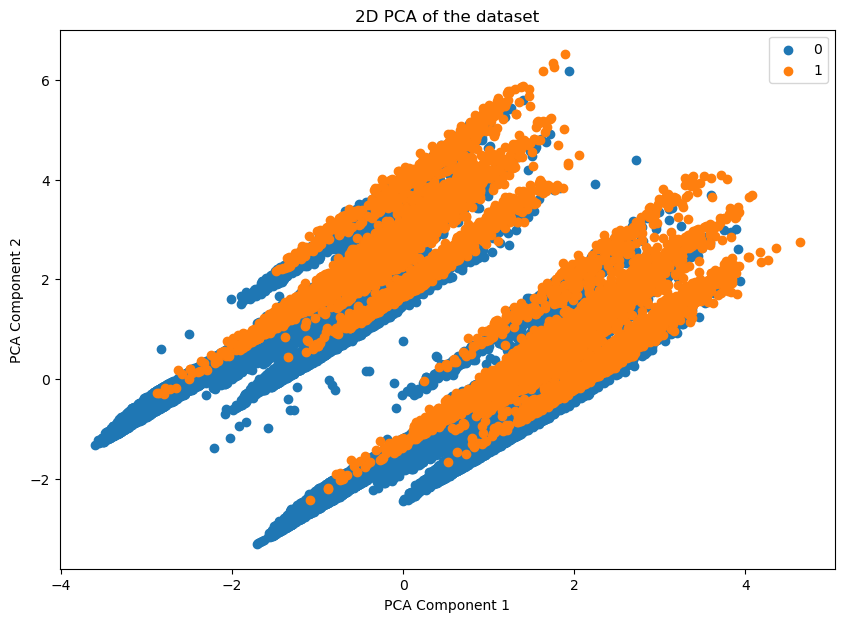

In [13]:
# Step 1: Visualize the data using PCA (if more than 2 features)
# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Applying PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the data
plt.figure(figsize=(10, 7))
for i, target_name in enumerate(np.unique(y)):
    plt.scatter(X_pca[y == target_name, 0], X_pca[y == target_name, 1], label=target_name)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of the dataset')
plt.legend()
plt.show()


In [14]:

# Step 2: Check linear separability using SVM with a linear kernel
svm = SVC(kernel='linear')
svm.fit(X_scaled, y)

# Check the accuracy
accuracy = svm.score(X_scaled, y)
print(f"SVM with linear kernel accuracy: {accuracy * 100:.2f}%")

# If accuracy is 100%, the data might be linearly separable
if accuracy == 1.0:
    print("The data appears to be linearly separable.")
else:
    print("The data is not linearly separable.")


SVM with linear kernel accuracy: 96.10%
The data is not linearly separable.
